# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires numpy>=1.26.0, but you have numpy 1.25.2 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\JohnAraujo\.pyenv\pyenv-win\versions\3.11.0\python.exe -m pip install --upgrade pip


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [4]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Read the data
df = pd.read_csv('./foodhub_order.csv') ## Fill the blank to read the data

In [5]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Check the shape of the dataset
df.shape ## Fill in the blank



(1898, 9)

#### The .csv file contains 1898 rows and 9 columns. It is a moderately sized dataset suitable for analysis and allow for fast processing.

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [15]:
print(f"{df['restaurant_name'].dtype}")

object


####
#### The 9 columns follow a basic pattern for column types. It uses int64 for integer numbers and Object to represent String or mixed data types.
#### The cost is represented as a float, as it should, because it allows fractions of dolar representations. 
#### We have 4 Strings/Objects, 4 integers, and 1 Float number
#### 
####
####
####

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
def check_missing_values(dataframe):
    ''' returns te missing values in each column of the dataframe'''
    return dataframe.isnull().sum()

missing_values = check_missing_values(df)

print (f"Missing Values of each column:\n{missing_values}")
  #Write the appropriate function to print the sum of null values for each column

Missing Values of each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64int64


####
####   There are no columns with null values
####   The dataset is whole in complete
####


In [9]:
display(df)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Get the summary statistics of the numerical data
df.describe() ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


####
#### The minimum time to prepare the food was 20.00 Min
#### The average time to prepare the food was 27.37 Min
#### The max time to prepare the food was     35.00 Min
####

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#df['rating'].value_counts()['Not given'] ## Complete the code

# disregard of capitalization
count = (df['rating'].str.lower() == 'not given').sum()
print(f"Number of 'Not given' ratings: {count}")

Number of 'Not given' ratings: 736


####
#### 736 orders were not rated out of 1898, meaning 39% of the orders were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [19]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [22]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [23]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

####
####   Out of 1898 customer orders there are 1200 unique customers, from 178 Restaurantes providing 14 Cuisine Types. 
####
####

<Axes: xlabel='cuisine_type', ylabel='count'>

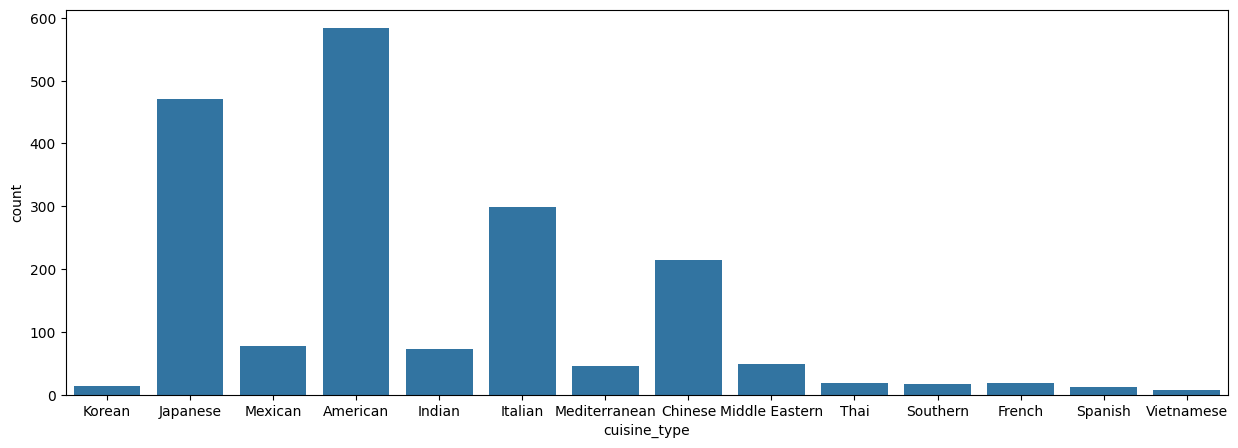

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

In [40]:
df.groupby('cuisine_type')['restaurant_name'].nunique().sort_values(ascending=False)

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64

In [ ]:

df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

#### The restaurants that most sell are americans and japaneses, followed by Italians and chinese. 
#### It appears that customer do not prefer  Vietnameses, spanishes, and koreans, considering the orders. Despite, there 
#### are more Korean restaurants than vietnamese and sourthern. 


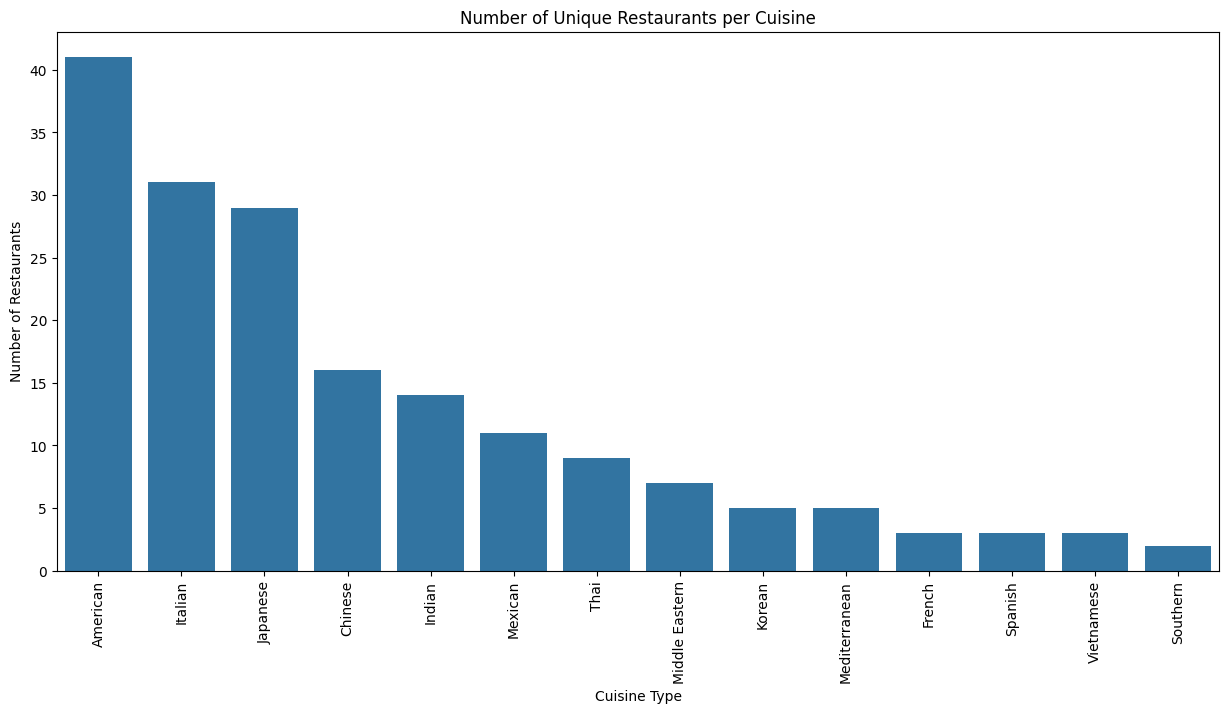

In [44]:

# Create a figure
plt.figure(figsize=(15, 7))

restaurants_per_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique().sort_values(ascending=False)
# Create the countplot
# Note: We use the original dataframe but we need to ensure we only count unique restaurants
# It is often easier to plot the processed series we created above
sns.barplot(x=restaurants_per_cuisine.index, y=restaurants_per_cuisine.values)

plt.xticks(rotation=90) # Rotate labels so they don't overlap
plt.title('Number of Unique Restaurants per Cuisine')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine Type')
plt.show()

#### Cost of the order

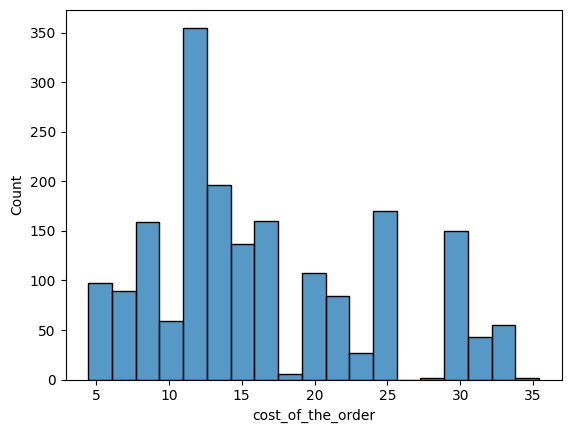

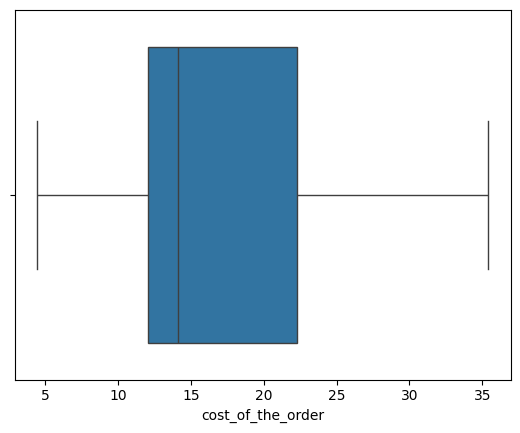

In [25]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [45]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

#### Cost of Order
The typical order cost is around 14. While the costs range from roughly 5 to 35
Most people tend to buy cheap below 14
The bulk revenue comes from orders from 12 to 22/23 dolars 
There are no visible outliers represented may be for the fact there are no party orders
The higher orders are around 35/36 dolares, probably from families. 



#### Day of the week

In [26]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

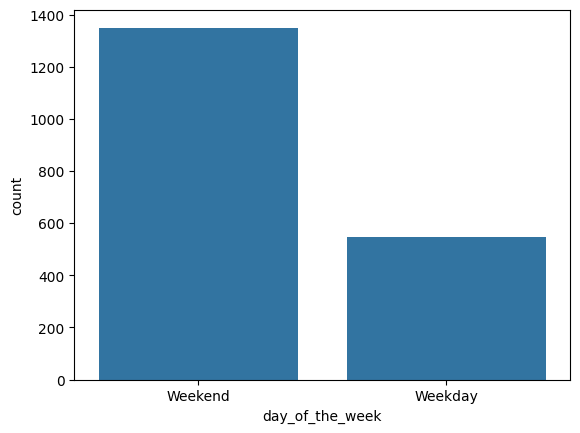

In [27]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Day of the week
Most customers buy on weekends as opposed to weekdays. Probably, because people want to enjoy the weekend out. 

#### Rating

In [28]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

<Axes: xlabel='rating', ylabel='count'>

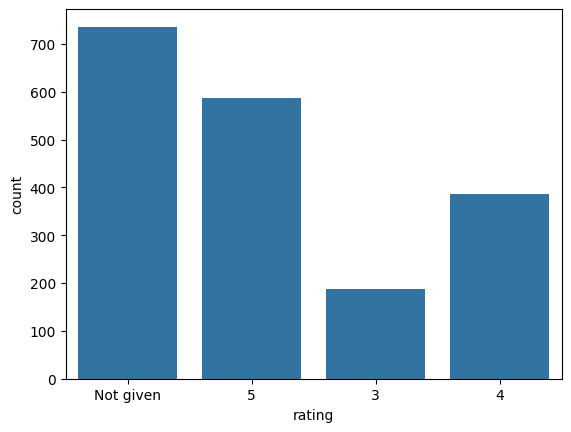

In [29]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Ratings

People do not rate all the time. It may happen because of the familiarity with technology or the rush of the day. It seems we do not have bad restaurants or food rated 1 and 2. Most restaurants are well rated 4 and 5. While some restaurants are average they are not the majority. 


#### Food Preparation Time


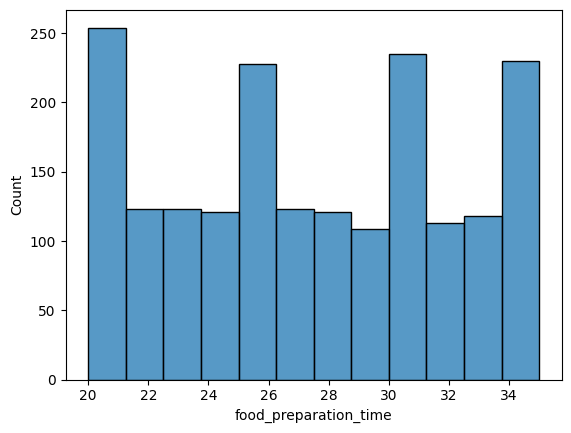

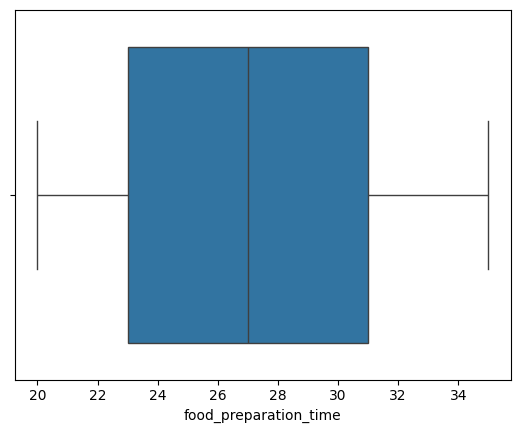

In [46]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

In [53]:
df.groupby('cuisine_type')['food_preparation_time'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
Southern,17.0,27.588235,5.523346,20.0,24.00,26.0,33.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Thai,19.0,27.315789,5.498006,21.0,22.00,28.0,32.5,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Spanish,12.0,26.916667,4.501683,20.0,23.75,27.5,28.5,35.0


#### Food Preparation Time

Around 25% of the food took less than 23 min to prepare, being the minimun 20 min  
50% of the food took from 23 to 33 min to prepare. 

Overall the preparation time for all restaurants/cuisines are the same. Deeper looking at the average, min, and max of all the restaurants there are no outliers. Restaurants probably try to be closer to preparation time of other restaurants to stay competitive.

#### Delivery time

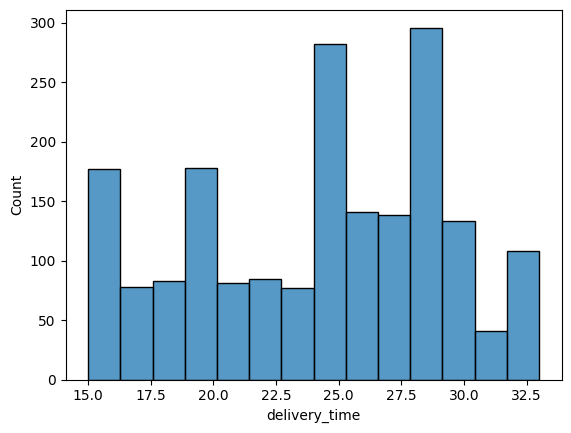

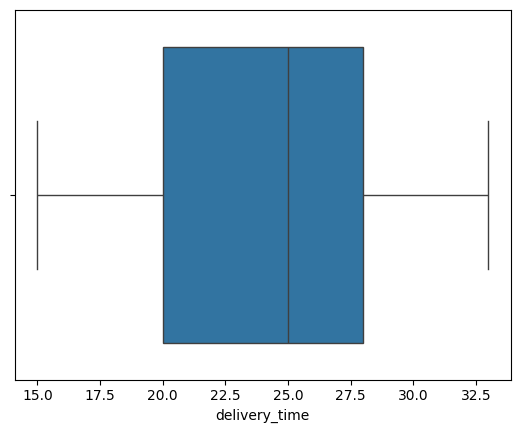

In [54]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

#### Delivery Time

The fastest delivery time is 15 min  
The common delivery is 25 min  
The longest delivery is 33 min.   
Because the median line is slightly closer to the right side of the box. It implies that   
most deliveries are around 25-28 min.  
Looking from the left skew to the mid skew we can infer that there are more fast deliveries than slow. 

Considering cost of order and delivery time it is fair to say the low cost (14) is delivered in average time. 
The logistic is predictable for all restaurants types. It may be a good place to improve in the future to attract more customers.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [124]:
df[['restaurant_name', 'cuisine_type']].value_counts().head(100) ## Complete the code

restaurant_name              cuisine_type
Shake Shack                  American        219
Blue Ribbon Sushi            Japanese        119
The Meatball Shop            Italian         112
Blue Ribbon Fried Chicken    American         96
Parm                         Italian          68
                                            ... 
Schnipper's Quality Kitchen  American          3
da Umberto                   Italian           3
Prosperity Dumpling          Chinese           3
Dickson's Farmstand Meats    American          3
Tres Carnes                  Mexican           3
Length: 100, dtype: int64

In [125]:
df[['cuisine_type']].value_counts().head(100) ## Complete the code

cuisine_type  
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
dtype: int64

#### The five restaurants in terms of orders are 
```
restaurant_name            cuisine_type
Shake Shack                American        219
Blue Ribbon Sushi          Japanese        119
The Meatball Shop          Italian         112
Blue Ribbon Fried Chicken  American         96
Parm                       Italian          68
```


### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [61]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [67]:
df.groupby('cuisine_type')['day_of_the_week'].value_counts().sort_values(ascending=False).head(10)

cuisine_type  day_of_the_week
American      Weekend            415
Japanese      Weekend            335
Italian       Weekend            207
American      Weekday            169
Chinese       Weekend            163
Japanese      Weekday            135
Italian       Weekday             91
Mexican       Weekend             53
Chinese       Weekday             52
Indian        Weekend             49
Name: day_of_the_week, dtype: int64

### The Most popular cuisine on the weekend

The most popular is American with 415 orders
```
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

```


### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [69]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### Cost of order 

The number of total orders that cost above 20 dollars is: 555  
Percentage of orders above 20 dollars: 29.24 %  

### **Question 10:** What is the mean order delivery time? [1 mark]

In [70]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### Answer 10 - The mean order delivery time

The mean delivery time for the order is 24.16 minutes  


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [76]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

### Answer 11

The Most Frequent Customers and their number of their orders  
```
customer_id     count
52832           13
47440           10
83287           9
250494          8
259341          7

```

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

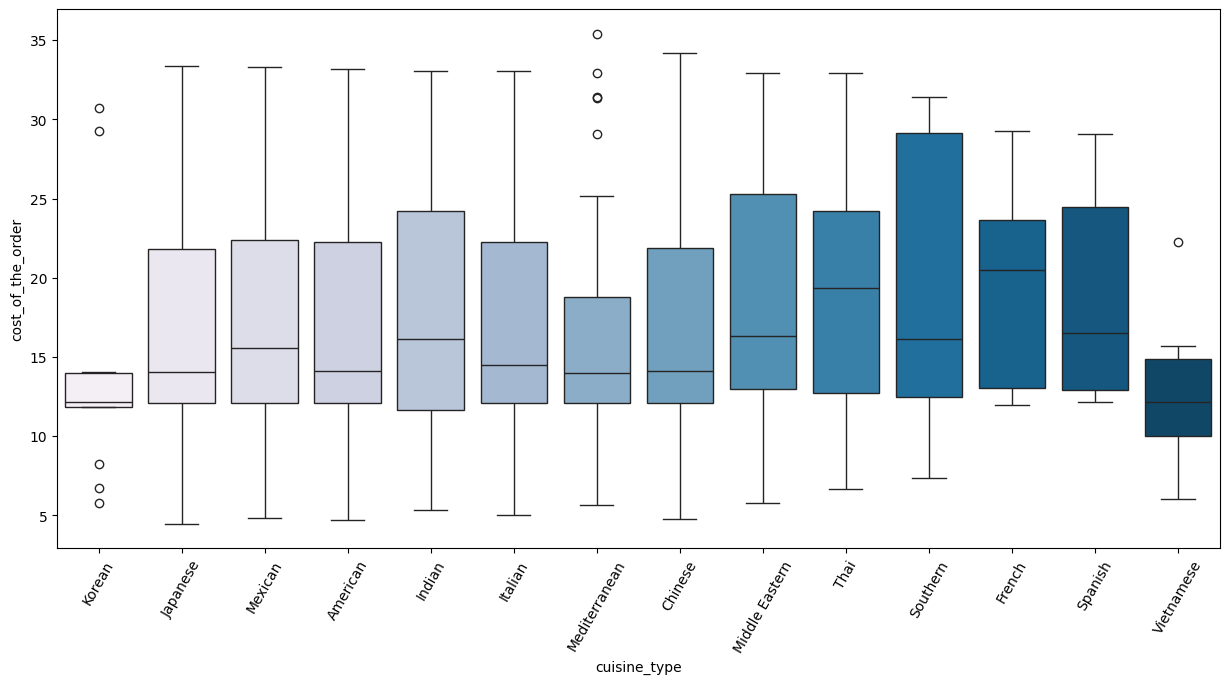

In [77]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

In [86]:
df.groupby('cuisine_type')['cost_of_the_order'].median()

cuisine_type
American          14.120
Chinese           14.120
French            20.470
Indian            16.150
Italian           14.480
Japanese          14.070
Korean            12.180
Mediterranean     13.995
Mexican           15.570
Middle Eastern    16.300
Southern          16.110
Spanish           16.520
Thai              19.350
Vietnamese        12.130
Name: cost_of_the_order, dtype: float64

### Cost of order vs Cuisine

The graph shows that Frent has the highest median cost.  
it also has the majority of the order above mediam.  
It is typical order is $6 to 7 dollars(df.groupby('cuisine_type')['cost_of_the_order'].median()) more expensive than almost any other cuisine

cuisine_type      mediam
American          14.120
Chinese           14.120
French            20.470
Indian            16.150
Italian           14.480
Japanese          14.070
Korean            12.180
Mediterranean     13.995
Mexican           15.570
Middle Eastern    16.300
Southern          16.110
Spanish           16.520
Thai              19.350
Vietnamese        12.130


#### Cuisine vs Food Preparation time

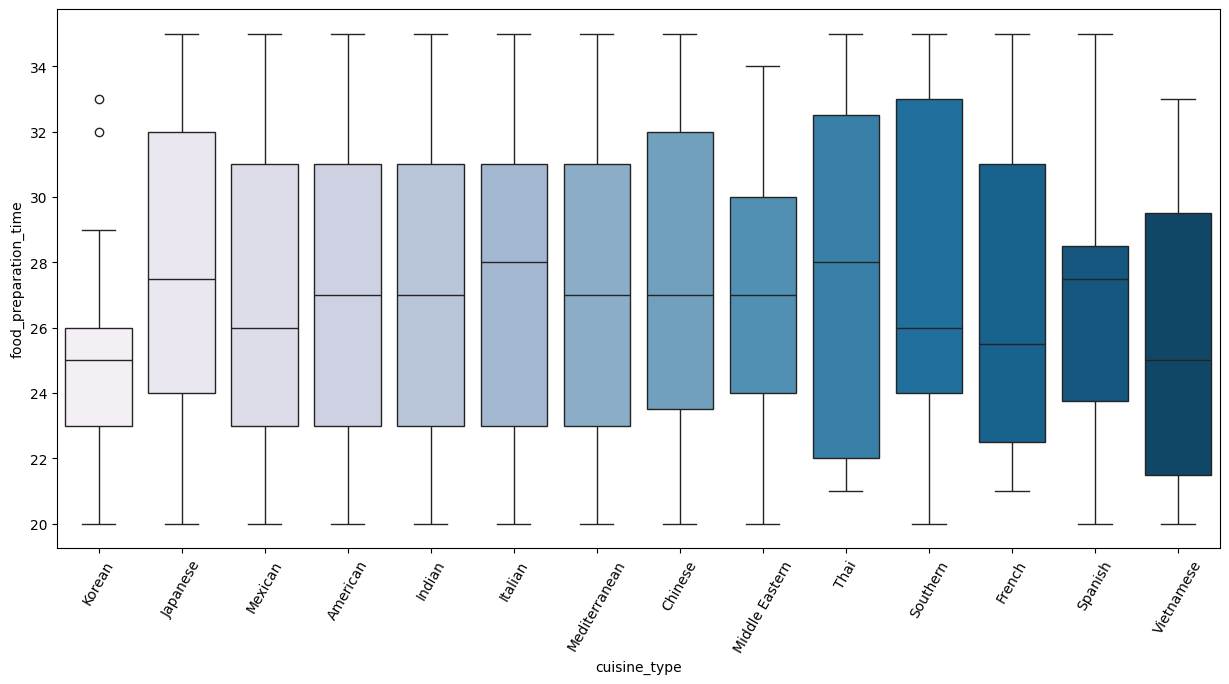

In [79]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

In [93]:
df[df['cuisine_type'] == 'Korean'][['cuisine_type', 'food_preparation_time']].value_counts()

cuisine_type  food_preparation_time
Korean        25                       4
              21                       2
              26                       2
              20                       1
              23                       1
              29                       1
              32                       1
              33                       1
dtype: int64

In [88]:
df.groupby('cuisine_type')['food_preparation_time'].max().sort_values(ascending=False)

cuisine_type
American          35
Chinese           35
French            35
Indian            35
Italian           35
Japanese          35
Mediterranean     35
Mexican           35
Southern          35
Spanish           35
Thai              35
Middle Eastern    34
Korean            33
Vietnamese        33
Name: food_preparation_time, dtype: int64

### Food preparation time vs cuisine_type

The graphic shows that the median food preparation time is close to all cuisine. 
Korean cuisine is the fastest preparation given 50% is from 23 to 26 minutes, and the max 29 min. 
It is the lowest is 20 min. Korean is also close to Vietnamese, though it has some outliers.

Italian, Thai, and Southern have median closer to 28 minutes, they are slightly slower.

The lowest time to prepare is not much different for all restaurants/cuisine. It ranges from 20 to 21 min. 

The graphic talks a lot about the processes in the kitchen, they seem to be the same for all order, for the
outcome time is basically the same. 

One can also predict given the graphic that any order is going to be ready in the range of 20-35 min. 


The Korean outliers 32, 33
    df[df['cuisine_type'] == 'Korean'][['cuisine_type', 'food_preparation_time']].value_counts()

cuisine_type  food_preparation_time
Korean        25                       4
              21                       2
              26                       2
              20                       1
              23                       1
              29                       1
              32                       1
              33                       1



#### Day of the Week vs Delivery time

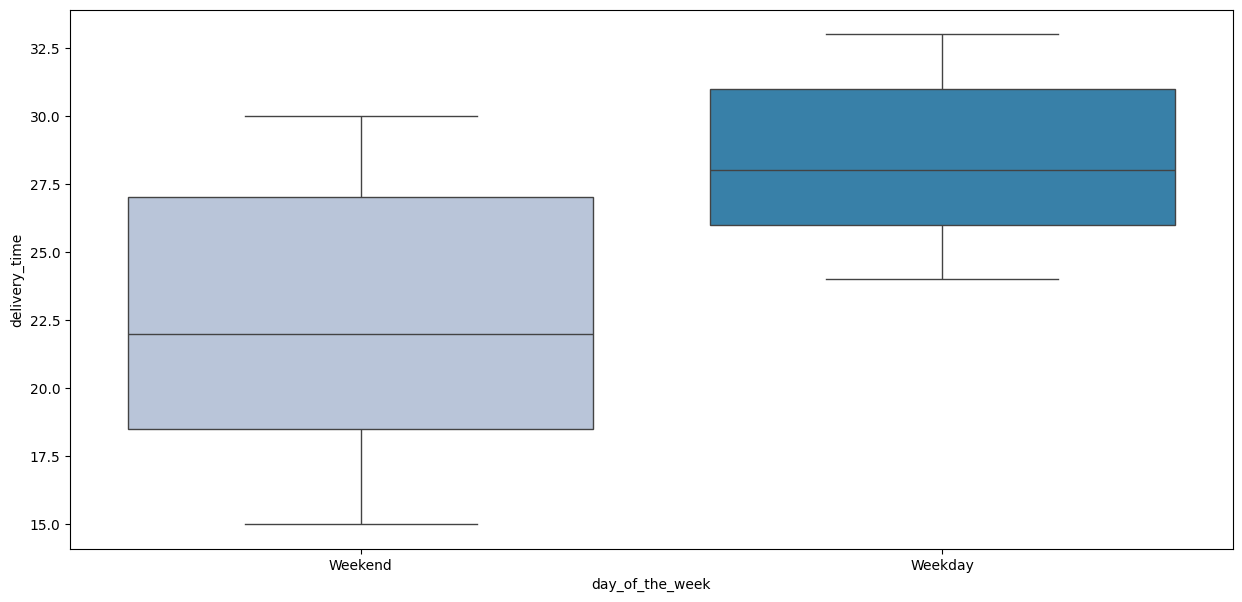

In [80]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

### Day of week delivery time

The graphic shows that the delivery time during week days is more than the median delivery time during weekend.  Probably because of the amount of deliverers available, giving there are more delivers during weekend. It may  also be the result of low traffic on the weekend.  

The lowest delivery time is 15 min on weekend, and the highest 35 min on weekday. 



#### Run the below code and write your observations on the revenue generated by the restaurants.

In [81]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

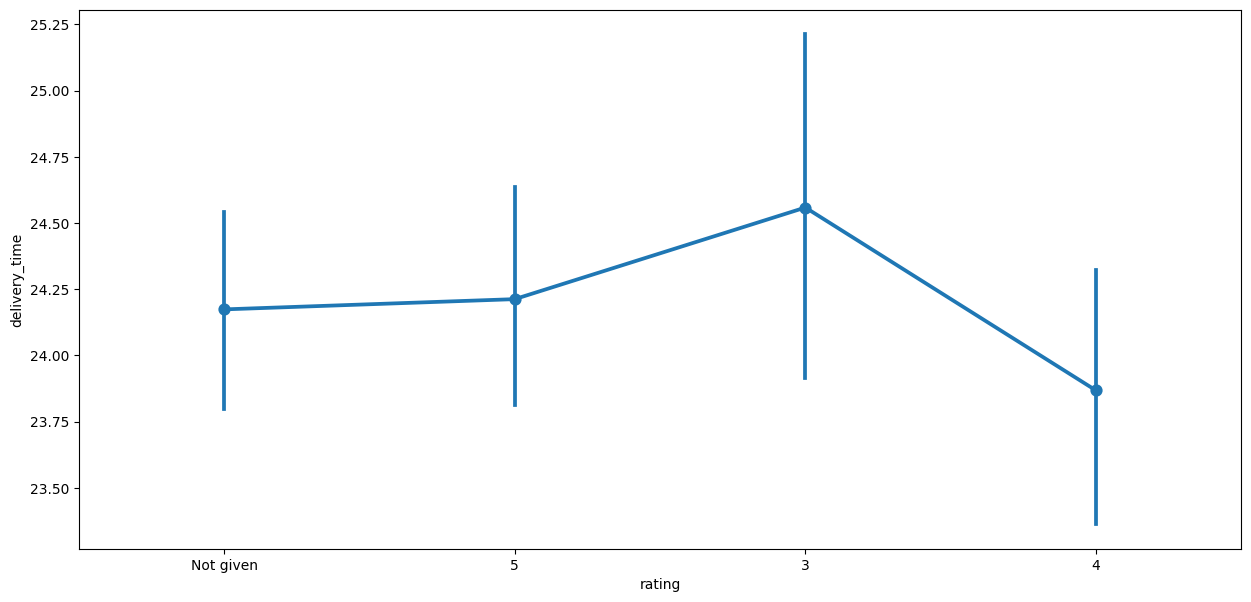

In [82]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Graphic Info
The data shows that there is no strong correlation between the rate and the average delivery time, 
which ranges from slightly higher than 23.75 to 24.5, a thin difference.  

There is a slightly higher delivery time on same samples for orders with rate 3.

There are lots of overlaps, line at the same swimlane, height and low, which indicates it the difference is not  meaningful.  


#### Rating vs Food preparation time

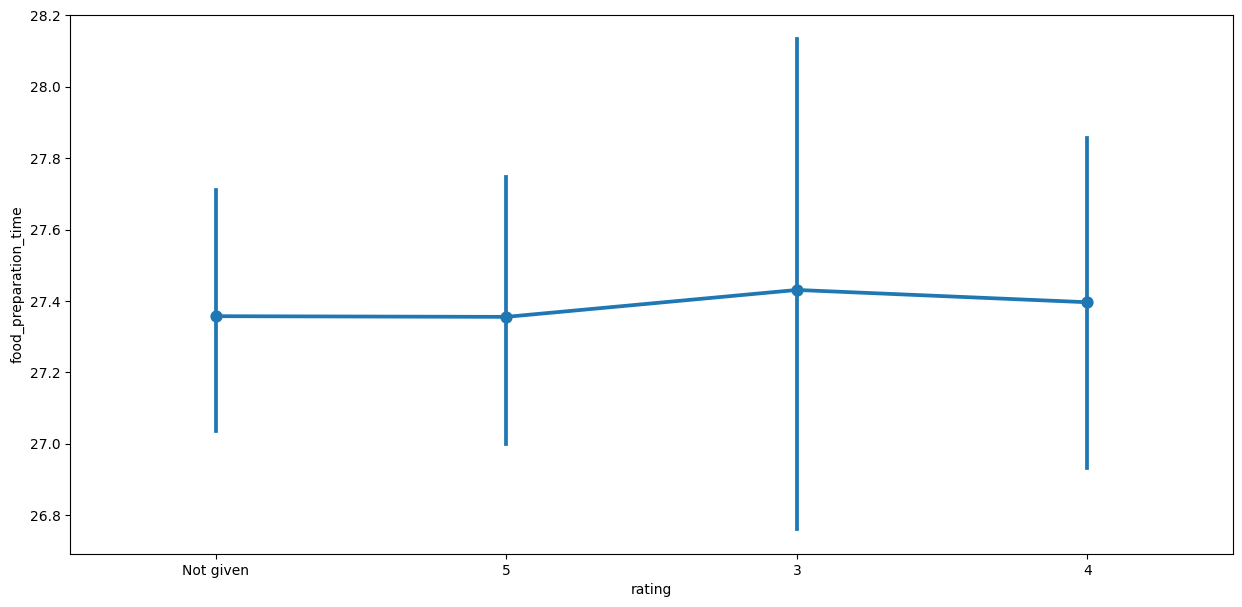

In [94]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

# the Rating vs Food Preparation time

The graphic shows that the average of the rating to food preparation time is the same for all the rates.   
It shows that overall the preparation time is not related to rate. 

it seems that time is not related to rating. 



#### Rating vs Cost of the order

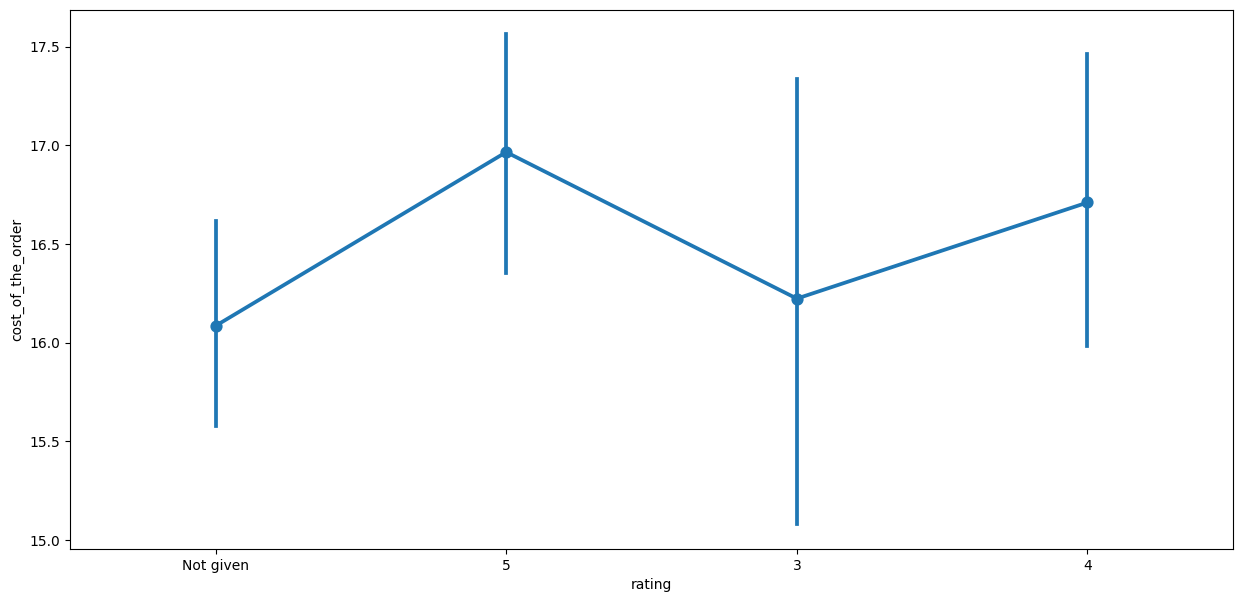

In [95]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

### Rating vs Cost of Order

It shows that higher spending are related to higher ratings. One can see from the spike in the rating 5 median,  
going up to $17

The lower rates are associated to cheaper order. May be the lower level food is not impressing customer, it is  
just as expected. 



#### Correlation among variables

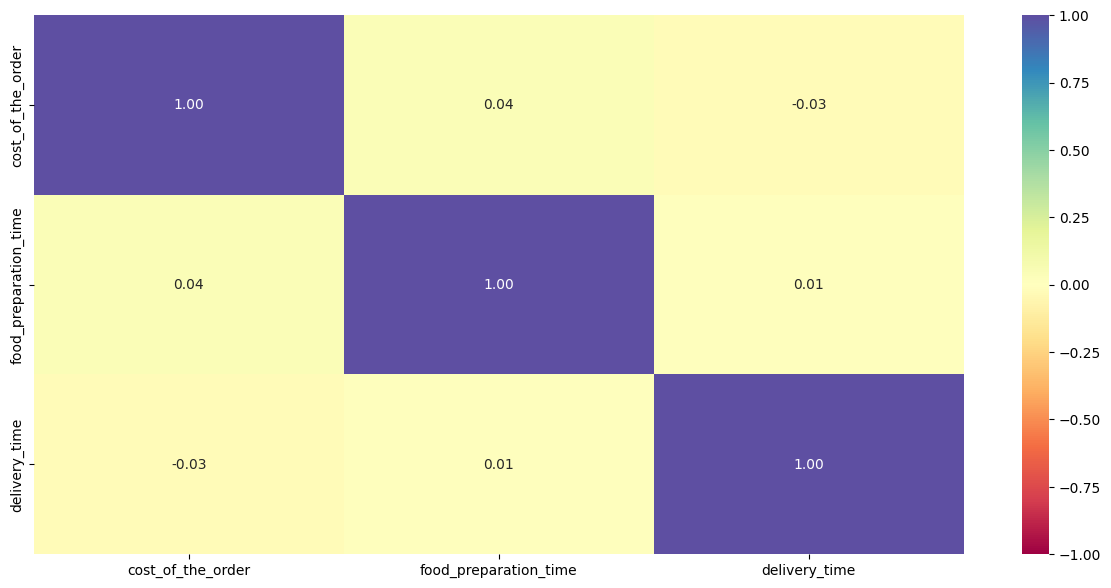

In [96]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Correlation among variable ( cost_of_the_order, food_preparation_time, delivery_time, )

Cost does not affect preparation_time, it is the opposite of what normally happens, more expensive food tend  
to be take more time to prepare. It seems the restaurants analysed have a solid approach to prepare the food. 

Cost also does not affect delivery time, meaning the logistic employed to deliver is well round.


Delivery time does not affect food preparation time or vice versa.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [110]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


### Restaurants and their rating counts
restaurant_name	            rating
Shake Shack	                133
The Meatball Shop	        84
Blue Ribbon Sushi	        73
Blue Ribbon Fried Chicken	64
RedFarm Broadway	        41


In [111]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### Restaurant with rating greater than 4



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [105]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()
df.groupby('restaurant_name')['Revenue'].sum().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  703.6070
The Meatball Shop            419.8285
Blue Ribbon Sushi            360.4605
Blue Ribbon Fried Chicken    340.2035
Parm                         218.5570
Name: Revenue, dtype: float64

### Revenue 

The column is cost of the order  

restaurant_name	            Revenue
Shake Shack	                703.61
The Meatball Shop	        419.83
Blue Ribbon Sushi	        360.46
Blue Ribbon Fried Chicken	340.20
Parm	                    218.56


In [107]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### Total Revenue 
The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [114]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Calculate the percentage of orders with total time > 60 minutes
df_60 = df[df['total_time'] > 60]
percentage_over_60 = (df_60.shape[0] / df.shape[0]) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")



Percentage of orders taking more than 60 minutes: 10.54%


### Percentage of the order exceeding 60 min from preparation to delivery
Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [115]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [122]:
#df['rating'].value_counts()

df[df['rating'] != 'Not given']['rating'].astype(int).mean() 

4.344234079173838

### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The FoodHub business is solid, it has a consistency process to prepare and deliver the food to customer on time and with quality. The FoodHub is rated Five for more than 50% of the ratings, and overal rate 4.34. It shows that customers are overall satisfied with the quality of the food and delivery. 

There is a clear positive correlation between Cost and rating. Customer ordering more expensive means, such as French and Southern tend to give 5 star ratings. On the other hand, orders with low rate and unrated are basically low price orders. High price is usually associated with higher satisfaction.

Korean, Vietnamese, and Japanese food are the most affordable ranging average $12-$14 and driving the majority of the orders. The French food is the most expensive(median > $20) overall. It propels high ratings, probably as the result, perception, or marketing of the food quality. 

Though the Korean food is generally fast to prepare, according to the multi-variable cuisine vs preparation time. There is a particular subset that suffer from significant delays(32,33 ) minutes, which are statistical outlier. 





### Recommendations:

*  

Recommendations

1. Based on rates and price correlation
   The low cost order are associated with lower rates, or no ratings. The entry-level menus may be lacking quality or size. 

   proposal: 
        Review and possibly increase portion sizes
        Change or remove the menu with options that would better suit your audience(Vegan, Youth, Older)
        Review food presentation

2. The delivery logistic
   Given the delivery logistic is not affecting the overal rate of the experience, inferred from the data, as delivery time was not rated separately, restaurants should focus on improving the quality of the food, presentation, and portions. Considering optimizing for faster delivery will not drive customer satisfaction.

   
3. Low-engagement customers
   Given that more than 700 customer did not rate the experience, it would be interesting to implement some sort of post order incentive(e.g. rate your experience and get 10% back the next order). Urated orders are also related to cheaper orders, getting feedback may be particularly important to find out the whether the low rate for cheaper food persists. 


4. Marketing 
   Outside of American, Japanese, Italian, Chinese, Mexican, and Indian the other restaurants received less than 30 orders in the period. FoodHub should focus its marketing to expand the offer to communities represented by the other cuisine type. The approach can increase the overall number of order and customers. 

   Restaurants such as Five Guys are not selling much, they probably represent the youth community. Campaings to address the youth community may also lead to new customers(e.g. Univerity promotions)

---